<a href="https://colab.research.google.com/github/kellysolanomt/MetNumUN2024I/blob/main/Lab2/ksolanoc_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Laboratorio desarrollado por:
***Grupo 20*** ❤

*   *Catalina Goméz Moreno*
*   *Ivana Alejandra Pedraza Hernández*
*   *Kelly Johana Solano Calderón*

***MetNum2024I***








---



In [ ]:
!pip install -U fortran-magic


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 13.7 MB/s eta 0:00:00


In [ ]:
%matplotlib inline
%load_ext fortranmagic

import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00',
                             '2017-01-07 00:00:00+00:00',
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

<center>
  <h1>The PyData Toolbox</h1>
  <h3>Scott Sanderson (Twitter: @scottbsanderson, GitHub: ssanderson)</h3>
  <h3><a href="https://github.com/ssanderson/pydata-toolbox">https://github.com/ssanderson/pydata-toolbox</a></h3>
</center>

# About Me:

<img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/me.jpg" alt="Drawing" style="width: 300px;"/>

- Senior Engineer at [Quantopian](www.quantopian.com)
- Background in Mathematics and Philosophy
- **Twitter:** [@scottbsanderson](https://twitter.com/scottbsanderson)
- **GitHub:** [ssanderson](github.com/ssanderson)

## Outline

- Built-in Data Structures
- Numpy `array`
- Pandas `Series`/`DataFrame`
- Plotting and "Real-World" Analyses

# Data Structures

> Rule 5. Data dominates. If you've chosen the right data structures and organized things well, the algorithms
will almost always be self-evident. Data structures, not algorithms, are central to programming.

- *Notes on Programming in C*, by Rob Pike.

# Lists

In [ ]:
assert ran_the_first_cell, "Oh noes!"

In [ ]:
l = [1, 'two', 3.0, 4, 5.0, "six"]
l

[1, 'two', 3.0, 4, 5.0, 'six']

In [ ]:
# Lists can be indexed like C-style arrays.
first = l[0]
second = l[1]
print("first:", first)
print("second:", second)

first: 1
second: two


In [ ]:
# Negative indexing gives elements relative to the end of the list.
last = l[-1]
penultimate = l[-2]
print("last:", last)
print("second to last:", penultimate)

last: six
second to last: 5.0


In [ ]:
# Lists can also be sliced, which makes a copy of elements between
# start (inclusive) and stop (exclusive)
sublist = l[1:3]
sublist

['two', 3.0]

In [ ]:
# l[:N] is equivalent to l[0:N].
first_three = l[:3]
first_three

[1, 'two', 3.0]

In [ ]:
# l[3:] is equivalent to l[3:len(l)].
after_three = l[3:]
after_three

[4, 5.0, 'six']

In [ ]:
# There's also a third parameter, "step", which gets every Nth element.
l = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
l[1:7:2]

['b', 'd', 'f']

In [ ]:
# This is a cute way to reverse a list.
l[::-1]

['h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']

In [ ]:
# Lists can be grown efficiently (in O(1) amortized time).
l = [1, 2, 3, 4, 5]
print("Before:", l)
l.append('six')
print("After:", l)

Before: [1, 2, 3, 4, 5]
After: [1, 2, 3, 4, 5, 'six']


In [ ]:
# Comprehensions let us perform elementwise computations.
l = [1, 2, 3, 4, 5]
[x * 2 for x in l]

[2, 4, 6, 8, 10]

## Review: Python Lists

- Zero-indexed sequence of arbitrary Python values.
- Slicing syntax: `l[start:stop:step]` copies elements at regular intervals from `start` to `stop`.
- Efficient (`O(1)`) appends and removes from end.
- Comprehension syntax: `[f(x) for x in l if cond(x)]`.

# Dictionaries

In [ ]:
# Dictionaries are key-value mappings.
philosophers = {'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}
philosophers

{'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}

In [ ]:
# Like lists, dictionaries are size-mutable.
philosophers['Ludwig'] = 'Wittgenstein'
philosophers

{'David': 'Hume',
 'Immanuel': 'Kant',
 'Bertrand': 'Russell',
 'Ludwig': 'Wittgenstein'}

In [ ]:
del philosophers['David']
philosophers

{'Immanuel': 'Kant', 'Bertrand': 'Russell', 'Ludwig': 'Wittgenstein'}

In [ ]:
# No slicing.
philosophers['Bertrand':'Immanuel']

TypeError: unhashable type: 'slice'

## Review: Python Dictionaries

- Unordered key-value mapping from (almost) arbitrary keys to arbitrary values.
- Efficient (`O(1)`) lookup, insertion, and deletion.
- No slicing (would require a notion of order).

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pacino.gif" alt="Drawing" style="width: 100%;"/></center>


In [ ]:
4 * "a"

'aaaa'

In [ ]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

##### Función matmul original

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/gross.gif" alt="Drawing" style="width: 50%;"/></center>


In [ ]:
%%time

matmul(a, b)

CPU times: user 26 µs, sys: 0 ns, total: 26 µs
Wall time: 29.3 µs


[[5, 8, 11, 14], [8, 13, 18, 23], [17, 28, 39, 50], [3, 5, 7, 9]]

**My own example 0 - cpu info**

In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
addres

**My own example 1 - Changing in matmul(A, B) Python len(B) (# of rows of B) for len(A[0]) (# of columns of A)**

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(A[0])):
                out[i][j] += A[i][k] * B[k][j]
    return out

**My own example 2 - Verifiying error with in matmul(A, B) Python with the original matrices when changing len(B) (# of rows of B) for len(A[0]) (# of colums of A)**

In [ ]:
# Se prueba la nueva definicion de la funcion matnul
%%time
matmul(a,b)

IndexError: list index out of range

Se percibe el error que surge por el cambio, donde ahora el index de la lista esta fuera de rango

**My own example 3 - Checking the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    if(len(A[0]) == len(B)):
      out = [[0 for col in range(cols_out)] for row in range(rows_out)]

      for i in range(rows_out):
          for j in range(cols_out):
              for k in range(len(A[0])):
                  out[i][j] += A[i][k] * B[k][j]
      return out
    else:
      print("Matrix dimensions are not compatible for multiplication")
      return

**My own example 4 -  Verifiying error with in matmul(A, B) Python when checking the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [ ]:
a1 = [[1, 3, 5],
      [3, 6, 9]]
b1 = [[3, 80],
      [4, 7]]

In [ ]:
%%time
matmul(a1,b1)

Matrix dimensions are not compatible for multiplication
CPU times: user 1.69 ms, sys: 0 ns, total: 1.69 ms
Wall time: 1.71 ms


**My own example 5 - Deifining A and B that are compatible for multiplcation**

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    if(len(A[0]) == len(B)):
      print("Matrix dimensions are compatible for multiplication")
      out = [[0 for col in range(cols_out)] for row in range(rows_out)]

      for i in range(rows_out):
          for j in range(cols_out):
              for k in range(len(A[0])):
                  out[i][j] += A[i][k] * B[k][j]
      return out
    else:
      print("Matrix dimensions are not compatible for multiplication")
      return

Ejemplo de ejecución

In [ ]:
a2 = [[3, 6, 6],
      [35, 7, 10],
      [6, 9, 12]]

b2 = [[7, 10, 45],
      [5, 6, 76],
      [7, 35, 9]]


**My own example 6 - Runinng the correct Python matrix multiplication code with the matrices with dimensions compatible for multiplication.**

In [ ]:
%%time
matmul(a2,b2)

Matrix dimensions are compatible for multiplication
CPU times: user 907 µs, sys: 0 ns, total: 907 µs
Wall time: 914 µs


[[93, 276, 645], [350, 742, 2197], [171, 534, 1062]]

In [ ]:
import random

In [ ]:
random.normalvariate(0,1)

0.8637652022406533

In [ ]:
import random
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

randm = random_matrix(2, 3)
randm

[[0.5072998739406608, 0.2770978645133053, 0.32361319191677795],
 [0.43276527454243097, 0.4846287916902249, 0.35893359809759684]]

**My own example 7 - Running 10 times matmul(randa, randb) with randa and randb a randon matrices of 600 x 100 and 100 x 600 and calulating the average execution time**

In [ ]:
import time
import random

randa = np.random.rand(600, 100)
randb = np.random.rand(100, 600)

tiempo_total = 0
n = 10

for i in range(n):
  tiempo_inicial = time.process_time()
  resultado = matmul(randa, randb)
  tiempo_final = time.process_time()
  tiempo_total += tiempo_final - tiempo_inicial

Promedio =  tiempo_total/n

print(f"Tiempo promedio de ejecución: {Promedio} segundos")

Matrix dimensions are compatible for multiplication
Matrix dimensions are compatible for multiplication
Matrix dimensions are compatible for multiplication
Matrix dimensions are compatible for multiplication
Matrix dimensions are compatible for multiplication
Matrix dimensions are compatible for multiplication
Matrix dimensions are compatible for multiplication
Matrix dimensions are compatible for multiplication
Matrix dimensions are compatible for multiplication
Matrix dimensions are compatible for multiplication
Tiempo promedio de ejecución: 27.5971840789 segundos


**My own example 8 - Creating the average execution time data frame and adding Python's average execution time**

In [ ]:
import pandas as pd

dict = {'method':['Python'],
        'Average time':[Promedio]
        }

df = pd.DataFrame(dict)
display(df)

,method,Average time
0,Python,27.597184


**My own example 9 - Running 10 times randa and randb mutiplicaction as NumPy arrays  adding NumPy's average execution time**

In [ ]:
import pandas as pd
import numpy as np

randa = np.random.rand(600, 100)
randb = np.random.rand(100, 600)

tiempo_total = 0
n = 10

for i in range(n):
  tiempo_inicial = time.process_time()
  resultado = np.dot(randa, randb)
  tiempo_final = time.process_time()
  tiempo_total += tiempo_final - tiempo_inicial

Promedio_np =  tiempo_total/n

new_numpy = {'method': 'Numpy', 'Average time': Promedio_np}
df = pd.concat([df, pd.DataFrame([new_numpy])], ignore_index=True)
display(df)

,method,Average time
0,Python,27.597184
1,Numpy,0.007189


In [ ]:
%%time
randa = random_matrix(600, 100)
randb = random_matrix(100, 600)
x = matmul(randa, randb)

Matrix dimensions are compatible for multiplication
CPU times: user 8.25 s, sys: 14 ms, total: 8.27 s
Wall time: 8.35 s


In [ ]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

In [ ]:
%%fortran
subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result

    result = sum(xs * ys)
end

In [ ]:
list_data = [float(i) for i in range(100000)]
array_data = np.array(list_data)

In [ ]:
%%time
python_dot_product(list_data, list_data)

CPU times: user 11.7 ms, sys: 0 ns, total: 11.7 ms
Wall time: 11.7 ms


333328333350000.0

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 189 µs, sys: 0 ns, total: 189 µs
Wall time: 199 µs


333328333350000.0

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/sloth.gif" alt="Drawing" style="width: 1080px;"/></center>


**My own example 10 - Defining A (2x2)  and B (2x2)**

In [ ]:
a3 = [[367, 644],
      [35, 7]]

b3 = [[18, 6],
      [24, 9]]


**My own example 11 - Defining Fortran subroutine matmul(A,B) for 2x2 matrices**

In [ ]:
%%fortran

subroutine matnul_fortran_2x2(A,B,R,N,L,M)

implicit none
integer, intent(in):: N,L,M
double precision, intent(in):: A(2,*)
double precision, intent(in):: B(2,*)
double precision, intent(out):: R(N,M)

integer I,J,K

do I=1,N
do J=1,M
R(I,J) = 0.0
do K=1,L
R(I,J) = R(I,J) + A(I,K)*B(K,J)
end do
end do
end do
end subroutine



**My own example 12 -Run Fortran subroutine matmul(A,B) with a and b 2x2 matrices**

In [ ]:
rows_a = len(a3)
cols_b = len(b3[0])
cols_a = len(a3[0])
matnul_fortran_2x2(a3, b3, rows_a, cols_a, cols_b)

array([[22062.,  7998.],
       [  798.,   273.]])

**My own example 13 - Defining Fortran subroutine matmul(A,B) for 600x100 and 100x600 matrices**

In [ ]:
%%fortran

subroutine matmul_fortran_600x100(A,B,R,N,L,M)

implicit none
integer, intent(in):: N,L,M
double precision, intent(in):: A(600,*)
double precision, intent(in):: B(100,*)
double precision, intent(out):: R(N,M)

integer I,J,K

do I=1,N
do J=1,M
R(I,J) = 0.0
do K=1,L
R(I,J) = R(I,J) + A(I,K)*B(K,J)
end do
end do
end do
end subroutine

**My own example 14 -Run Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices**

In [ ]:
a4 = np.array(random_matrix(600,100))
b4 = np.array(random_matrix(100,600))
rows_a4 = len(a4)
cols_a4 = len(a4[0])
cols_b4 = len(b4[0])
matmul_fortran_600x100(a4,b4,rows_a4,cols_a4,cols_b4)

array([[24.10316851, 23.29650239, 24.53105146, ..., 25.14838509,
        26.24537535, 22.5407752 ],
       [24.89859979, 23.31173606, 25.84910591, ..., 26.16450326,
        27.19636197, 22.13572289],
       [26.79970212, 24.01562818, 27.39730059, ..., 29.28577651,
        28.23304835, 24.595625  ],
       ...,
       [26.58510269, 24.41883644, 26.33590057, ..., 27.41241514,
        27.0001089 , 23.85325377],
       [27.6686694 , 26.69516452, 26.1144839 , ..., 28.76928228,
        27.67406028, 23.18749327],
       [22.98891964, 22.3616236 , 24.00092705, ..., 24.82188265,
        24.91598827, 22.25143804]])

**My own example 15 - Running 10 times the  Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices and adding Fortran magic average execution time to the data frame**

In [ ]:
import pandas as pd
import numpy as np
import time

randa = np.random.rand(600, 100)
randb = np.random.rand(100, 600)
rows_randa = len(randa)
cols_randa = len(randa[0])
cols_randb = len(randb[0])

tiempo_total_for = 0
n = 10

for i in range(n):
  tiempo_inicial_for = time.process_time()
  resultado_for = matmul_fortran_600x100(randa, randb, rows_randa, cols_randa, cols_randb)
  tiempo_final_for = time.process_time()
  tiempo_total_for += tiempo_final_for - tiempo_inicial_for

Promedio_for =  tiempo_total_for/n

new_numpy_for = {'method': 'Fortran magic', 'Average time': Promedio_for}
df = pd.concat([df, pd.DataFrame([new_numpy_for])], ignore_index=True)
display(df)

,method,Average time
0,Python,27.597184
1,Numpy,0.007189
2,Fortran magic,0.042713


**My own example 16 - Creating a  Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile matmul_2_fortran_600x100.f
            program matmul_2_fortran_600x100



                integer :: na = 600, ma = 100, nb = 100, mb = 600
                double precision, dimension(600, 100) :: A
                double precision, dimension(100, 600) :: B
                double precision, dimension(600, 600) :: C
                real :: total_time_f, time_start_f, time_end_f, average_time_f, count
                integer :: i, j, k, repetitions, seed

                seed = 1000
                ! Call RANDOM_SEED function
                call RANDOM_SEED(seed)

                ! Generate random values for matrix A
                do i = 1, na
                    do j = 1, ma
                      CALL RANDOM_NUMBER(A(i,j))
                    end do
                end do

                ! Generate random values for matrix B
                do i = 1, nb
                    do j = 1, mb
                        CALL RANDOM_NUMBER(B(i,j))
                    end do
                end do

                ! Perform repetitions
                repetitions = 10
                total_time_f = 0.0
                do k = 1, repetitions
                    ! Start timer
                    call cpu_time(time_start_f)
                    C = matmul(A, B)
                    ! Stop timer
                    call cpu_time(time_end_f)
                    count = time_end_f - time_start_f
                    total_time_f = total_time_f + count

                end do

                ! Calculate and print average time
                average_time_f = total_time_f / 10.0
                print *, "El tiempo promedio de ejecucion es: "
                print *, average_time_f

                ! Write average time to file
                open(unit=10, file='time_average_f.txt', status='old')
                write(10, *) average_time_f
                close(10)

                stop

            end program matmul_2_fortran_600x100







Overwriting matmul_2_fortran_600x100.f


**My own example 17 - Running the Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
!gfortran matmul_2_fortran_600x100.f -o matmul_2_fortran_600x100
!./matmul_2_fortran_600x100

 El tiempo promedio de ejecucion es: 
   4.77390038E-03


**My own example 18 - Adding Fortran average execution time to the data frame**

In [ ]:
archivo_fortran = open('time_average_f.txt','r')
tiempo_promedio_f = float(archivo_fortran.readline())
new_fortran = {'method': 'Fortran', 'Average time': tiempo_promedio_f}
df = pd.concat([df, pd.DataFrame([new_fortran])], ignore_index=True)
display(df)

,method,Average time
0,Python,27.597184
1,Numpy,0.007189
2,Fortran magic,0.042713
3,Fortran,0.004774


**My own example 19 - Creating a c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

**My own example 20 - Running the c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

**My own example 21 - Adding c average execution time to the data frame**

**My own example 22 - Creating a C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

**My own example 23 - Running the C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

**My own example 24 - Adding C++ average execution time to the data frame**

**My own example 25 - Creating a Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile matrixmultiplication.java
import java.util.Random;
import java.io.FileWriter;
import java.io.IOException;

class matrixmultiplication {

    public static void main(String[] args) {

        int r1 = 600, c1 = 100;
        int r2 = 100, c2 = 600;
        double[][] first_matrix = generate_matrix(600,100);
        double[][] second_matrix = generate_matrix(100,600);

        double average_time_execution = average_execution(first_matrix, second_matrix, r1, c1, c2);
        System.out.println("El tiempo promedio de ejecución´en java fue de: " + average_time_execution);

        try{
            FileWriter file_writer = new FileWriter("time_java.txt");
            file_writer.write(Double.toString(average_time_execution));
            file_writer.close();
        }catch(IOException e){
            e.printStackTrace();
        }
    }

    static double[][] multiply_matrices(double[][] first_matrix, double[][] second_matrix, int r1, int c1, int c2){
        double[][] product = new double[r1][c2];
        for(int i = 0; i < r1; i++){
            for(int j=0;j<c2;j++){
                for(int k=0; k<c1; k++){
                    product[i][j] += first_matrix[i][k] * second_matrix[k][j];
                }
            }
        }
        return product;

    }

    static void display_product(int[][] product) {
        System.out.println("Product of two matrices is: ");
        for(int[] row : product) {
            for (int column : row) {
                System.out.print(column + "    ");
            }
            System.out.println();
        }
    }

    static double[][] generate_matrix(int n, int m){
        Random random = new Random();
        double[][] matrix = new double[n][m]; // Matriz de doubles
        for (int i = 0; i < n; i++) {
          for (int j = 0; j < m; j++) {
            matrix[i][j] = random.nextDouble(); // Genera un double aleatorio
          }
        }
        return matrix;
    }

    static double average_execution(double[][] first_matrix, double[][] second_matrix, int r1, int c1, int c2){
        long total_execution_time = 0;
        for(int i = 0;i < 10;i++){
          long time_start = System.currentTimeMillis();
          multiply_matrices(first_matrix, second_matrix, r1, c1, c2);
          long time_end = System.currentTimeMillis();
          long execution_time = time_end - time_start;
          total_execution_time += execution_time;
        }

        double average_time = (double) total_execution_time/(10 * 1000);
        return average_time;
    }


}

Writing matrixmultiplication.java


**My own example 26 - Running the Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
!javac matrixmultiplication.java
!java matrixmultiplication

El tiempo promedio de ejecución´en java fue de: 0.0771


**My own example 27 - Adding Java average execution time to the data frame**

In [ ]:
archivo_java = open('time_java.txt');
tiempo_promedio_java = float(archivo_java.readline());
new_java = {'method': 'Java', 'Average time': tiempo_promedio_java}
df = pd.concat([df,pd.DataFrame([new_java])], ignore_index=True)
display(df)

,method,Average time
0,Python,27.597184
1,Numpy,0.007189
2,Fortran magic,0.042713
3,Fortran,0.004774
4,Java,0.077100


**My own example 28 - Creating a Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

**My own example 29 - Running the Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

**My own example 30 - Adding Javascript average execution time to the data frame**

**My own example 31 - Finding the minimun average execution time in the data frame**

In [ ]:
minimun_index = df["Average time"].idxmin()
minimun_method = df.loc[minimun_index]
print(minimun_method)

method           Fortran
Average time    0.004774
Name: 3, dtype: object


**My own example 32 - Adding the Speed factor columne to the data frame**

In [ ]:
df['Speed factor'] = df['Average time'].apply(lambda x: 1/x)
display(df)

,method,Average time,Speed factor
0,Python,27.597184,0.036236
1,Numpy,0.007189,139.097239
2,Fortran magic,0.042713,23.412306
3,Fortran,0.004774,209.472323
4,Java,0.077100,12.970169


**My own example 33 - Sorting the the data frame by average execution time**

In [ ]:
df.sort_values("Average time", inplace=True)
display(df)

,method,Average time,Speed factor
3,Fortran,0.004774,209.472323
1,Numpy,0.007189,139.097239
2,Fortran magic,0.042713,23.412306
4,Java,0.077100,12.970169
0,Python,27.597184,0.036236


,Language,Average Secs,Speed factor
1,NumPy,0.006613,1.000000
3,Fortran,0.007648,1.156599
2,Fortranmagic,0.014852,2.245952
6,Java,0.076835,11.619354
4,c,0.200000,30.244991
5,C++,0.221157,33.444457
7,Javascript,0.282100,42.660559
0,Python,8.277163,1251.713539


## Why is the Python Version so Much Slower?

In [ ]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
#[type(x) for x in _]

[1, (4+0j), 9.0, 'fourfourfourfour']

In [ ]:
# Interpretation overhead.
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

  1           0 LOAD_NAME                0 (a)
              2 LOAD_NAME                1 (b)
              4 LOAD_NAME                2 (c)
              6 BINARY_MULTIPLY
              8 BINARY_ADD
             10 RETURN_VALUE


## Why is the Python Version so Slow?
- Dynamic typing means that every single operation requires dispatching on the input type.
- Having an interpreter means that every instruction is fetched and dispatched at runtime.
- Other overheads:
  - Arbitrary-size integers.
  - Reference-counted garbage collection.

> This is the paradox that we have to work with when we're doing scientific or numerically-intensive Python. What makes Python fast for development -- this high-level, interpreted, and dynamically-typed aspect of the language -- is exactly what makes it slow for code execution.

- Jake VanderPlas, [*Losing Your Loops: Fast Numerical Computing with NumPy*](https://www.youtube.com/watch?v=EEUXKG97YRw)

# What Do We Do?

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/runaway.gif" alt="Drawing" style="width: 50%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/thisisfine.gif" alt="Drawing" style="width: 1080px;"/></center>

- Python is slow for numerical computation because it performs dynamic dispatch on every operation we perform...

- ...but often, we just want to do the same thing over and over in a loop!

- If we don't need Python's dynamicism, we don't want to pay (much) for it.

- **Idea:** Dispatch **once per operation** instead of **once per element**.

In [ ]:
import numpy as np

data = np.array([1, 2, 3, 4])
data

array([1, 2, 3, 4])

In [ ]:
data + data

array([2, 4, 6, 8])

In [ ]:
%%time
# Naive dot product
(array_data * array_data).sum()

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 408 µs


333328333350000.0

In [ ]:
%%time
# Built-in dot product.
array_data.dot(array_data)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 162 µs


333328333350000.0

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 313 µs


333328333350000.0

In [ ]:
# Numpy won't allow us to write a string into an int array.
data[0] = "foo"

ValueError: invalid literal for int() with base 10: 'foo'

In [ ]:
# We also can't grow an array once it's created.
data.append(3)

In [ ]:
# We **can** reshape an array though.
two_by_two = data.reshape(2, 2)
two_by_two

Numpy arrays are:

- Fixed-type

- Size-immutable

- Multi-dimensional

- Fast\*

\* If you use them correctly.

# What's in an Array?

In [ ]:
arr = np.array([1, 2, 3, 4, 5, 6], dtype='int16').reshape(2, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

Array:
[[1 2 3]
 [4 5 6]]
DType: int16
Shape: (2, 3)
Strides: (6, 2)
Data: b'\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00'


# Core Operations

- Vectorized **ufuncs** for elementwise operations.
- Fancy indexing and masking for selection and filtering.
- Aggregations across axes.
- Broadcasting

# UFuncs

UFuncs (universal functions) are functions that operate elementwise on one or more arrays.

In [ ]:
data = np.arange(15).reshape(3, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [ ]:
# Binary operators.
data * data

array([[  0,   1,   4,   9,  16],
       [ 25,  36,  49,  64,  81],
       [100, 121, 144, 169, 196]])

In [ ]:
# Unary functions.
np.sqrt(data)

array([[ 0.        ,  1.        ,  1.41421356,  1.73205081,  2.        ],
       [ 2.23606798,  2.44948974,  2.64575131,  2.82842712,  3.        ],
       [ 3.16227766,  3.31662479,  3.46410162,  3.60555128,  3.74165739]])

In [ ]:
# Comparison operations
(data % 3) == 0

array([[ True, False, False,  True, False],
       [False,  True, False, False,  True],
       [False, False,  True, False, False]], dtype=bool)

In [ ]:
# Boolean combinators.
((data % 2) == 0) & ((data % 3) == 0)

array([[ True, False, False, False, False],
       [False,  True, False, False, False],
       [False, False,  True, False, False]], dtype=bool)

In [ ]:
# as of python 3.5, @ is matrix-multiply
data @ data.T

array([[ 30,  80, 130],
       [ 80, 255, 430],
       [130, 430, 730]])

# UFuncs Review

- UFuncs provide efficient elementwise operations applied across one or more arrays.
- Arithmetic Operators (`+`, `*`, `/`)
- Comparisons (`==`, `>`, `!=`)
- Boolean Operators (`&`, `|`, `^`)
- Trigonometric Functions (`sin`, `cos`)
- Transcendental Functions (`exp`, `log`)

# Selections

We often want to perform an operation on just a subset of our data.

In [ ]:
sines = np.sin(np.linspace(0, 3.14, 10))
cosines = np.cos(np.linspace(0, 3.14, 10))
sines

array([ 0.        ,  0.34185385,  0.64251645,  0.86575984,  0.98468459,
        0.98496101,  0.8665558 ,  0.64373604,  0.34335012,  0.00159265])

In [ ]:
# Slicing works with the same semantics as Python lists.
sines[0]

0.0

In [ ]:
sines[:3]  # First three elements

array([ 0.        ,  0.34185385,  0.64251645])

In [ ]:
sines[5:]  # Elements from 5 on.

array([ 0.98496101,  0.8665558 ,  0.64373604,  0.34335012,  0.00159265])

In [ ]:
sines[::2]  # Every other element.

array([ 0.        ,  0.64251645,  0.98468459,  0.8665558 ,  0.34335012])

In [ ]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("sines:\n", sines)
print("sines > 0.5:\n", sines > 0.5)
print("sines[sines > 0.5]:\n", sines[sines > 0.5])

sines:
 [ 0.          0.34185385  0.64251645  0.86575984  0.98468459  0.98496101
  0.8665558   0.64373604  0.34335012  0.00159265]
sines > 0.5:
 [False False  True  True  True  True  True  True False False]
sines[sines > 0.5]:
 [ 0.64251645  0.86575984  0.98468459  0.98496101  0.8665558   0.64373604]


In [ ]:
# We index with lists/arrays of integers to select values at those indices.
print(sines)
sines[[0, 4, 7]]

[ 0.          0.34185385  0.64251645  0.86575984  0.98468459  0.98496101
  0.8665558   0.64373604  0.34335012  0.00159265]


array([ 0.        ,  0.98468459,  0.64373604])

In [ ]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data = np.array([1, 3, 2, 12, -1, 5, 2])

In [ ]:
sort_indices = np.argsort(unsorted_data)
sort_indices

array([4, 0, 2, 6, 1, 5, 3])

In [ ]:
unsorted_data[sort_indices]

array([-1,  1,  2,  2,  3,  5, 12])

In [ ]:
market_caps = np.array([12, 6, 10, 5, 6])  # Presumably in dollars?
assets = np.array(['A', 'B', 'C', 'D', 'E'])

In [ ]:
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap = np.argsort(market_caps)
assets[sort_by_mcap]

array(['D', 'B', 'E', 'C', 'A'],
      dtype='<U1')

In [ ]:
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

Dates:
 array(['2017-01-06', '2017-01-07', '2017-01-08'], dtype='datetime64[D]')
Values:
 array([10, 15, 20])
Calendar:
 array(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
       '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
       '2017-01-13', '2017-01-17', '2017-01-18', '2017-01-19',
       '2017-01-20', '2017-01-23', '2017-01-24', '2017-01-25',
       '2017-01-26', '2017-01-27', '2017-01-30', '2017-01-31', '2017-02-01'], dtype='datetime64[D]')


In [ ]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

Raw Dates: ['2017-01-06' '2017-01-07' '2017-01-08']
Indices: [3 4 4]
Forward-Filled Dates: ['2017-01-06' '2017-01-09' '2017-01-09']


On multi-dimensional arrays, we can slice along each axis independently.

In [ ]:
data = np.arange(25).reshape(5, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [ ]:
data[:2, :2]  # First two rows and first two columns.

array([[0, 1],
       [5, 6]])

In [ ]:
data[:2, [0, -1]]  # First two rows, first and last columns.

array([[0, 4],
       [5, 9]])

In [ ]:
data[(data[:, 0] % 2) == 0]  # Rows where the first column is divisible by two.

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24]])

# Selections Review

- Indexing with an integer removes a dimension.
- Slicing operations work on Numpy arrays the same way they do on lists.
- Indexing with a boolean array filters to True locations.
- Indexing with an integer array selects indices along an axis.
- Multidimensional arrays can apply selections independently along different axes.

## Reductions

Functions that reduce an array to a scalar.

$Var(X) = \frac{1}{N}\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}$

In [ ]:
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [ ]:
variance(np.random.standard_normal(1000))

1.0638195544963331

- `sum()` and `mean()` are both **reductions**.

- In the simplest case, we use these to reduce an entire array into a single value...

In [ ]:
data = np.arange(30)
data.mean()

14.5

- ...but we can do more interesting things with multi-dimensional arrays.

In [ ]:
data = np.arange(30).reshape(3, 10)
data

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]])

In [ ]:
data.mean()

14.5

In [ ]:
data.mean(axis=0)

array([ 10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.])

In [ ]:
data.mean(axis=1)

array([  4.5,  14.5,  24.5])

## Reductions Review

- Reductions allow us to perform efficient aggregations over arrays.
- We can do aggregations over a single axis to collapse a single dimension.
- Many built-in reductions (`mean`, `sum`, `min`, `max`, `median`, ...).

# Broadcasting

In [ ]:
row = np.array([1, 2, 3, 4])
column = np.array([[1], [2], [3]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

Row:
[1 2 3 4]
Column:
[[1]
 [2]
 [3]]


In [ ]:
row + column

array([[2, 3, 4, 5],
       [3, 4, 5, 6],
       [4, 5, 6, 7]])

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/broadcasting.png" alt="Drawing" style="width: 60%;"/></center>

<h5>Source: http://www.scipy-lectures.org/_images/numpy_broadcasting.png</h5>

In [ ]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=0), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

Data:
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]]
Mean:
[ 10.  11.  12.  13.  14.  15.  16.  17.  18.  19.]
Data - Mean:
[[-10. -10. -10. -10. -10. -10. -10. -10. -10. -10.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]]


# Broadcasting Review

- Numpy operations can work on arrays of different dimensions as long as the arrays' shapes are still "compatible".
- Broadcasting works by "tiling" the smaller array along the missing dimension.
- The result of a broadcasted operation is always at least as large in each dimension as the largest array in that dimension.

# Numpy Review

- Numerical algorithms are slow in pure Python because the overhead dynamic dispatch dominates our runtime.

- Numpy solves this problem by:
  1. Imposing additional restrictions on the contents of arrays.
  2. Moving the inner loops of our algorithms into compiled C code.

- Using Numpy effectively often requires reworking an algorithms to use vectorized operations instead of for-loops, but the resulting operations are usually simpler, clearer, and faster than the pure Python equivalent.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/unicorn.jpg" alt="Drawing" style="width: 75%;"/></center>

Numpy is great for many things, but...

- Sometimes our data is equipped with a natural set of **labels**:
  - Dates/Times
  - Stock Tickers
  - Field Names (e.g. Open/High/Low/Close)

- Sometimes we have **more than one type of data** that we want to keep grouped together.
  - Tables with a mix of real-valued and categorical data.

- Sometimes we have **missing** data, which we need to ignore, fill, or otherwise work around.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/panda-wrangling.gif" alt="Drawing" style="width: 75%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pandas_logo.png" alt="Drawing" style="width: 75%;"/></center>


Pandas extends Numpy with more complex data structures:

- `Series`: 1-dimensional, homogenously-typed, labelled array.
- `DataFrame`: 2-dimensional, semi-homogenous, labelled table.

Pandas also provides many utilities for:
- Input/Output
- Data Cleaning
- Rolling Algorithms
- Plotting

# Selection in Pandas

In [ ]:
s = pd.Series(index=['a', 'b', 'c', 'd', 'e'], data=[1, 2, 3, 4, 5])
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [ ]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s.index)
print("The values are:", s.values)

The index is: Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
The values are: [1 2 3 4 5]


In [ ]:
# We can look up values out of a Series by position...
s.iloc[0]

1

In [ ]:
# ... or by label.
s.loc['a']

1

In [ ]:
# Slicing works as expected...
s.iloc[:2]

a    1
b    2
dtype: int64

In [ ]:
# ...but it works with labels too!
s.loc[:'c']

a    1
b    2
c    3
dtype: int64

In [ ]:
# Fancy indexing works the same as in numpy.
s.iloc[[0, -1]]

a    1
e    5
dtype: int64

In [ ]:
# As does boolean masking.
s.loc[s > 2]

c    3
d    4
e    5
dtype: int64

In [ ]:
# Element-wise operations are aligned by index.
other_s = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0})
other_s

a    10.0
c    20.0
d    30.0
z    40.0
dtype: float64

In [ ]:
s + other_s

a    11.0
b     NaN
c    23.0
d    34.0
e     NaN
z     NaN
dtype: float64

In [ ]:
# We can fill in missing values with fillna().
(s + other_s).fillna(0.0)

a    11.0
b     0.0
c    23.0
d    34.0
e     0.0
z     0.0
dtype: float64

In [ ]:
# Most real datasets are read in from an external file format.
aapl = pd.read_csv('AAPL.csv', parse_dates=['Date'], index_col='Date')
aapl.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,27.613066,30.572857,30.642857,30.340000,30.490000,123432400.0
2010-01-05,27.660807,30.625713,30.798571,30.464285,30.657143,150476200.0
2010-01-06,27.220825,30.138571,30.747143,30.107143,30.625713,138040000.0
2010-01-07,27.170504,30.082857,30.285715,29.864286,30.250000,119282800.0
2010-01-08,27.351143,30.282858,30.285715,29.865715,30.042856,111902700.0


In [ ]:
# Slicing generalizes to two dimensions as you'd expect:
aapl.iloc[:2, :2]

,Adj Close,Close
Date,,
2010-01-04,27.613066,30.572857
2010-01-05,27.660807,30.625713


In [ ]:
aapl.loc[pd.Timestamp('2010-02-01'):pd.Timestamp('2010-02-04'), ['Close', 'Volume']]

,Close,Volume
Date,,
2010-02-01,27.818571,187469100.0
2010-02-02,27.980000,174585600.0
2010-02-03,28.461428,153832000.0
2010-02-04,27.435715,189413000.0


# Rolling Operations

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/rolling.gif" alt="Drawing" style="width: 75%;"/></center>

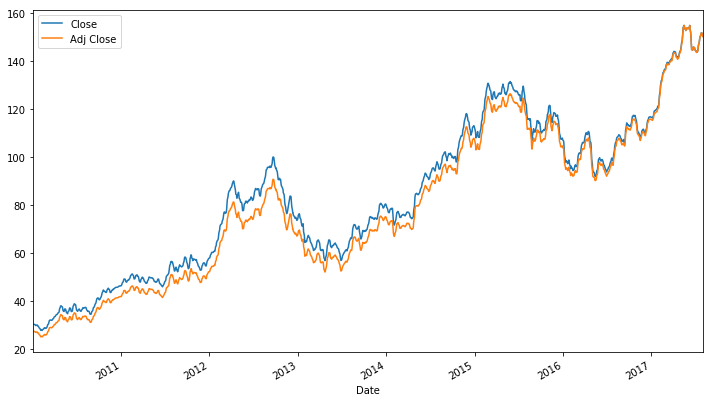

In [ ]:
aapl.rolling(5)[['Close', 'Adj Close']].mean().plot();

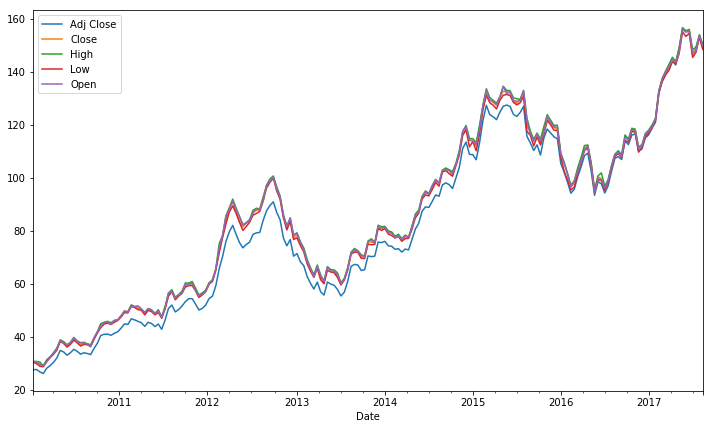

In [ ]:
# Drop `Volume`, since it's way bigger than everything else.
aapl.drop('Volume', axis=1).resample('2W').max().plot();

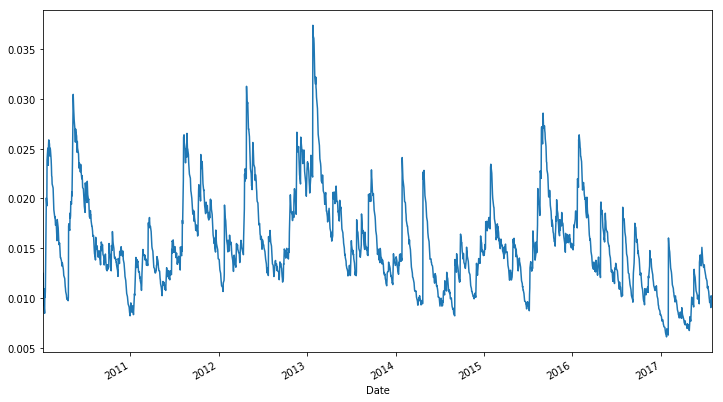

In [ ]:
# 30-day rolling exponentially-weighted stddev of returns.
aapl['Close'].pct_change().ewm(span=30).std().plot();

# "Real World" Data

In [ ]:
## Run this cell to test it
!git clone https://github.com/ssanderson/pydata-toolbox

Cloning into 'pydata-toolbox'...
remote: Enumerating objects: 88, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 88 (delta 22), reused 14 (delta 8), pack-reused 52
Receiving objects: 100% (88/88), 11.87 MiB | 12.76 MiB/s, done.
Resolving deltas: 100% (35/35), done.


In [ ]:
from demos.avocados import read_avocadata

avocados = read_avocadata('2014', '2016')
avocados.head()

/content/demos/avocados.py:55: FutureWarning: The default value of regex will change from True to False in a future version.
  frame['Region'] = frame['Region'].str.replace(' U.S.', '')


,Date,Region,Variety,Organic,Number of Stores,Weighted Avg Price,Low Price,High Price
0,2014-01-03 00:00:00+00:00,NATIONAL,HASS,False,9184,0.93,NaN,NaN
1,2014-01-03 00:00:00+00:00,NATIONAL,HASS,True,872,1.44,NaN,NaN
2,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,False,1449,1.08,0.5,1.67
3,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,True,66,1.54,1.5,2.00
4,2014-01-03 00:00:00+00:00,SOUTHEAST,HASS,False,2286,0.98,0.5,1.99


In [ ]:
# Unlike numpy arrays, pandas DataFrames can have a different dtype for each column.
avocados.dtypes

Date                  datetime64[ns, UTC]
Region                             object
Variety                            object
Organic                              bool
Number of Stores                    int64
Weighted Avg Price                float64
Low Price                         float64
High Price                        float64
dtype: object

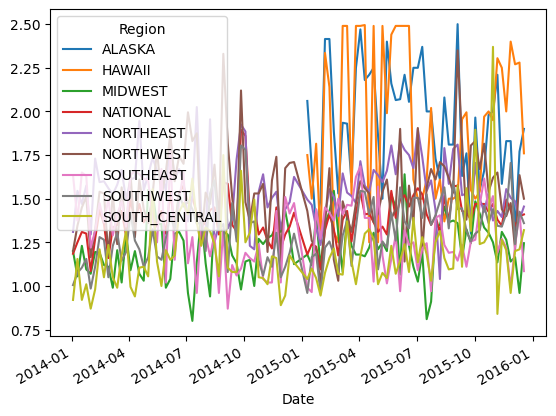

In [ ]:
# What's the regional average price of a HASS avocado every day?
hass = avocados[avocados.Variety == 'HASS']
hass.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

In [ ]:
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)

    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

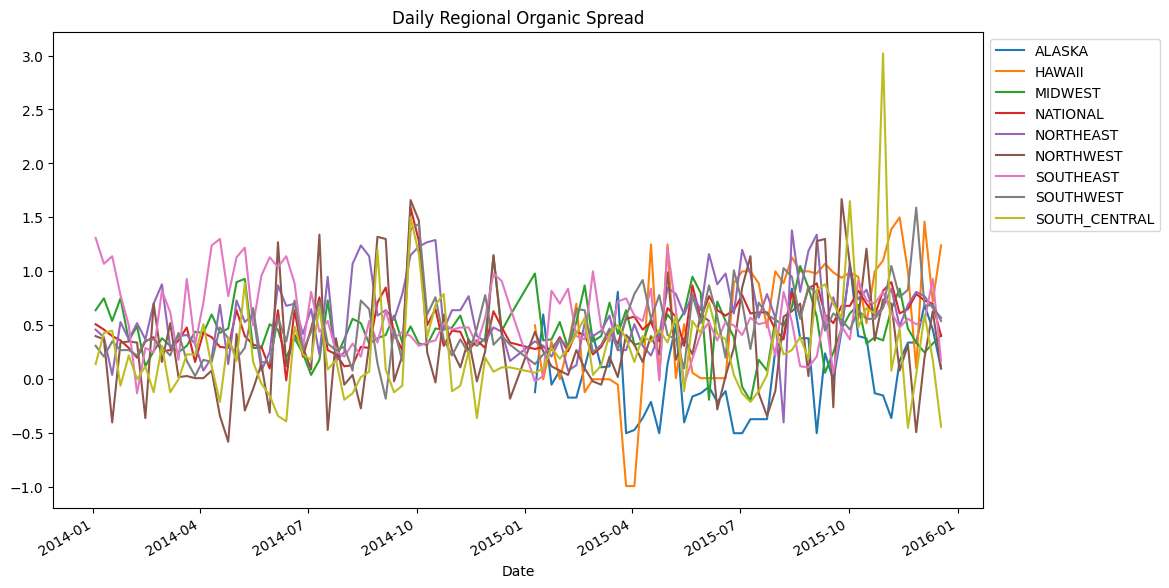

In [ ]:
organic_spread_by_region(hass).plot();
plt.gca().set_title("Daily Regional Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));

In [ ]:
spread_correlation = organic_spread_by_region(hass).corr()
spread_correlation

Region,ALASKA,HAWAII,MIDWEST,NATIONAL,NORTHEAST,NORTHWEST,SOUTHEAST,SOUTHWEST,SOUTH_CENTRAL
Region,,,,,,,,,
ALASKA,1.000000,0.202723,0.175251,0.007844,0.051049,0.087575,0.129079,-0.070868,0.161624
HAWAII,0.202723,1.000000,-0.021116,0.373914,0.247171,0.341155,0.019388,0.159192,0.092632
MIDWEST,0.175251,-0.021116,1.000000,0.062595,-0.010213,-0.043783,0.047437,-0.059128,0.068902
NATIONAL,0.007844,0.373914,0.062595,1.000000,0.502035,0.579102,-0.040539,0.635006,0.486524
NORTHEAST,0.051049,0.247171,-0.010213,0.502035,1.000000,0.242039,-0.236225,0.360389,0.149881
NORTHWEST,0.087575,0.341155,-0.043783,0.579102,0.242039,1.000000,-0.032306,0.165992,0.349935
SOUTHEAST,0.129079,0.019388,0.047437,-0.040539,-0.236225,-0.032306,1.000000,-0.167631,-0.021176
SOUTHWEST,-0.070868,0.159192,-0.059128,0.635006,0.360389,0.165992,-0.167631,1.000000,0.254504
SOUTH_CENTRAL,0.161624,0.092632,0.068902,0.486524,0.149881,0.349935,-0.021176,0.254504,1.000000


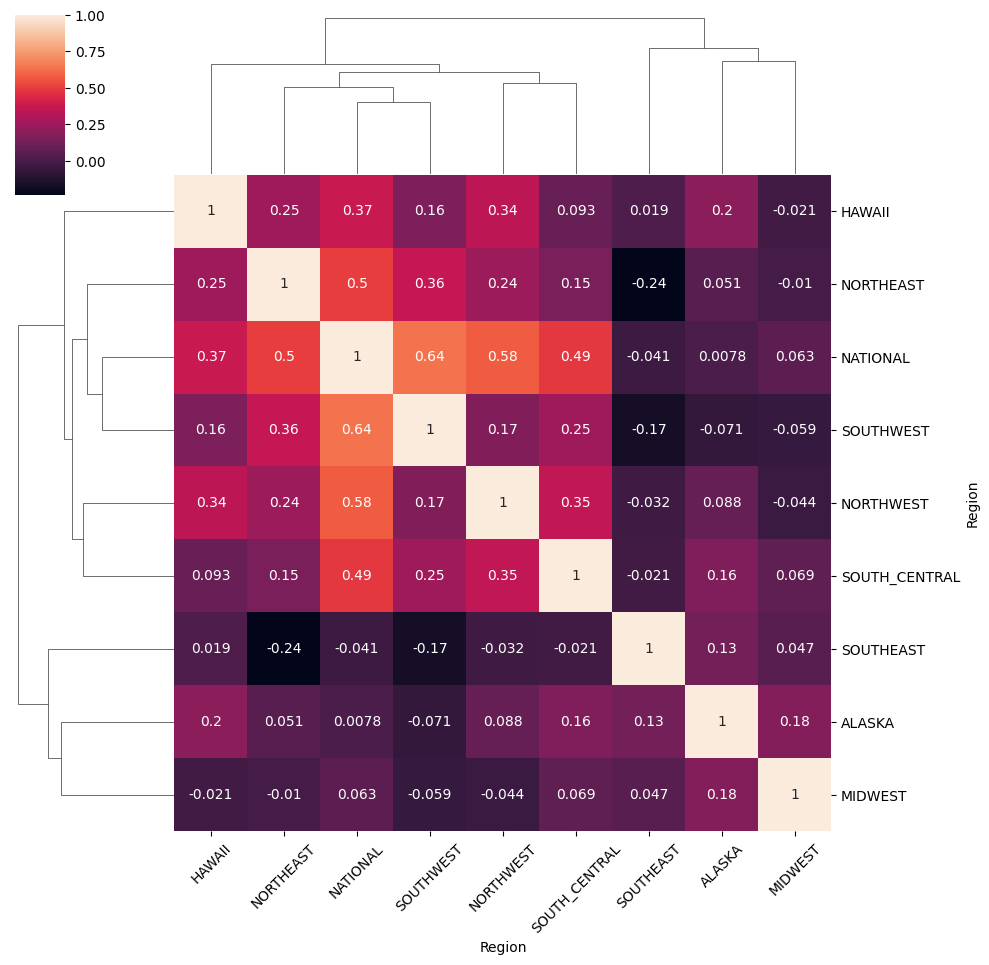

In [ ]:
import seaborn as sns
grid = sns.clustermap(spread_correlation, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

# Pandas Review

- Pandas extends numpy with more complex datastructures and algorithms.
- If you understand numpy, you understand 90% of pandas.
- `groupby`, `set_index`, and `unstack` are powerful tools for working with categorical data.
- Avocado prices are surprisingly interesting :)

# Thanks!

### Análisis de datos de datos.gov.co

In [ ]:
datos_eva_agro = pd.read_csv('Evaluaciones_Agropecuarias_Municipales_EVA_20240217.csv')
datos_eva_agro.head()

,Ciclo,Cultivo,Calendario,Año_EVA,Ene,Feb,Mar,Abr,May,Jun,Jul,Ago,Sep,Oct,Nov,Dic
0,Transitorio,Acelga,Cosechas,2022,5.55,5.66,15.04,6.17,13.72,8.36,11.51,7.04,6.77,2.82,9.55,7.82
1,Transitorio,Acelga,Siembras,2022,9.37,6.98,12.84,7.74,8.08,4.42,8.97,6.52,11.27,11.78,8.79,3.25
2,Permanente,Achiote,Cosechas,2022,8.34,5.81,6.54,6.46,5.28,7.98,11.78,12.66,7.24,6.02,7.93,13.96
3,Permanente,Achiote,Siembras,2022,12.52,16.04,16.68,12.43,8.71,10.48,6.74,3.75,3.32,3.32,3.01,3.01
4,Transitorio,Achira,Cosechas,2022,0.40,9.72,4.95,14.29,14.30,14.97,14.60,5.49,5.21,5.31,5.02,5.71


In [ ]:
datos_eva_agro.dtypes

Ciclo          object
Cultivo        object
Calendario     object
Año_EVA         int64
Ene           float64
Feb           float64
Mar           float64
Abr           float64
May           float64
Jun           float64
Jul           float64
Ago           float64
Sep           float64
Oct           float64
Nov           float64
Dic           float64
dtype: object

In [ ]:
datos_f = pd.DataFrame(datos_eva_agro)

In [ ]:
cosechas = datos_eva_agro[datos_eva_agro.Calendario == 'Cosechas']
display(cosechas)

,Ciclo,Cultivo,Calendario,Año_EVA,Ene,Feb,Mar,Abr,May,Jun,Jul,Ago,Sep,Oct,Nov,Dic
0,Transitorio,Acelga,Cosechas,2022,5.55,5.66,15.04,6.17,13.72,8.36,11.51,7.04,6.77,2.82,9.55,7.82
2,Permanente,Achiote,Cosechas,2022,8.34,5.81,6.54,6.46,5.28,7.98,11.78,12.66,7.24,6.02,7.93,13.96
4,Transitorio,Achira,Cosechas,2022,0.40,9.72,4.95,14.29,14.30,14.97,14.60,5.49,5.21,5.31,5.02,5.71
6,Permanente,Agraz,Cosechas,2022,0.00,0.00,0.00,50.00,0.00,0.00,0.00,0.00,0.00,50.00,0.00,0.00
8,Permanente,Aguacate,Cosechas,2022,7.68,4.88,8.96,11.19,9.57,9.96,8.77,5.04,7.24,8.40,11.93,6.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,Transitorio,Ulluco,Cosechas,2022,1.15,27.16,5.35,17.91,2.89,4.99,23.46,3.00,3.04,5.83,3.23,2.00
258,Permanente,Uva,Cosechas,2022,31.58,3.82,2.55,2.92,5.02,10.10,8.01,3.62,4.48,3.35,8.25,16.30
260,Transitorio,Yuca,Cosechas,2022,10.98,7.80,7.42,7.75,6.47,4.38,3.47,1.54,4.47,6.82,15.35,23.55
262,Transitorio,Zanahoria,Cosechas,2022,7.27,8.78,7.35,5.13,5.42,9.39,13.08,7.85,5.77,7.26,10.43,12.29


In [ ]:
import matplotlib.pyplot as plt
cosechas_df = pd.DataFrame(cosechas)
print(cosechas_df)

Text(0.5, 1.0, 'Nivel de cosecha en Octubre 2022 según el cultivo')

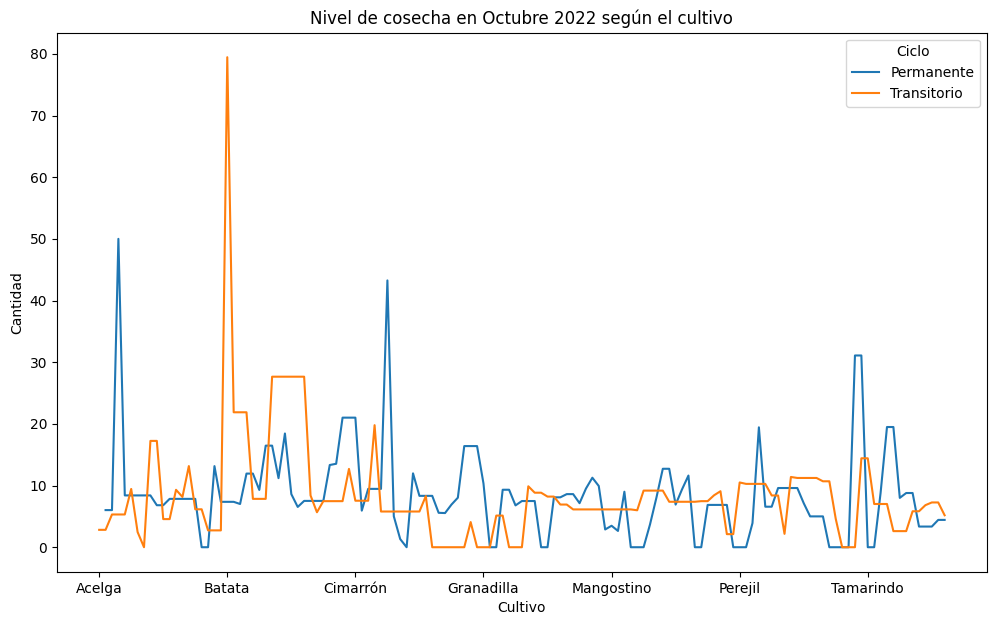

In [ ]:
cultivos_permanentes_cultivo = cosechas_df.groupby(['Cultivo', 'Ciclo'])['Oct'].mean().unstack().ffill().plot()
cultivos_permanentes_cultivo.set_ylabel('Cantidad')
cultivos_permanentes_cultivo.set_title('Nivel de cosecha en Octubre 2022 según el cultivo')
# sns.barplot(x=cultivos_permanentes_cultivo.index, y=cultivos_permanentes_cultivo.values)
# cultivos_permanentes_cultivo

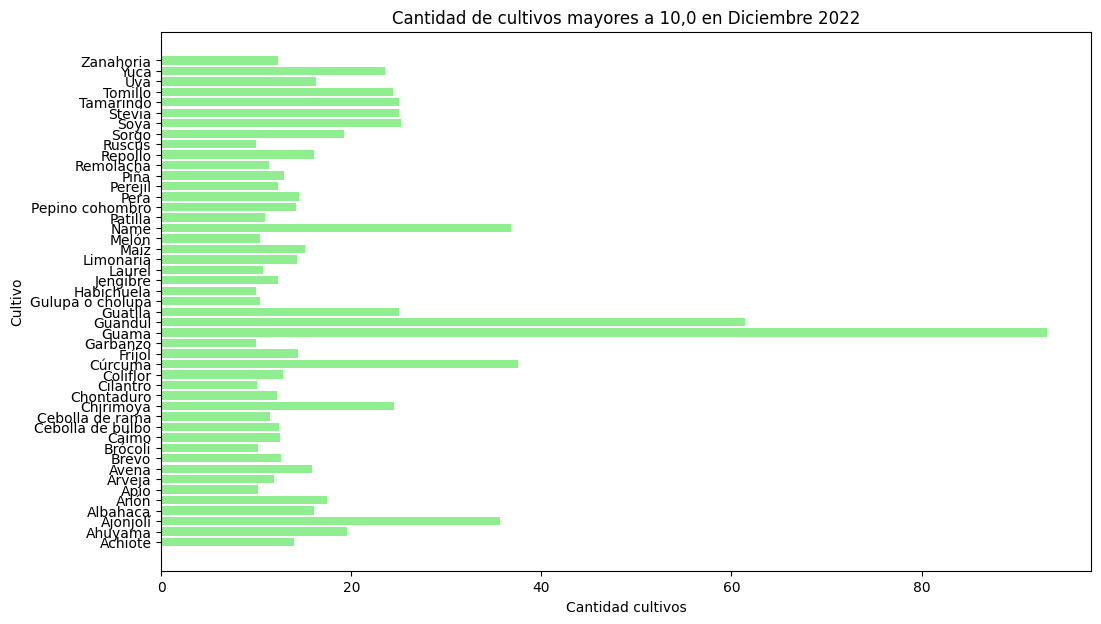

In [ ]:
cultivos_mas_vendidos_dic = cosechas_df[cosechas_df['Dic'] >= 10.0]
cultivos_mas_vendidos_dic = cultivos_mas_vendidos_dic[['Ciclo', 'Cultivo', 'Dic']]
plt.barh(cultivos_mas_vendidos_dic['Cultivo'], cultivos_mas_vendidos_dic['Dic'], color='lightgreen')
plt.ylabel('Cultivo')
plt.xlabel('Cantidad cultivos')
plt.title('Cantidad de cultivos mayores a 10,0 en Diciembre 2022')
plt.show()

In [ ]:
categorias = datos_f.groupby(['Ciclo', 'Calendario'])['Calendario'].count()
display(categorias)

Ciclo        Calendario
Permanente   Cosechas      76
             Siembras      76
Transitorio  Cosechas      57
             Siembras      57
Name: Calendario, dtype: int64

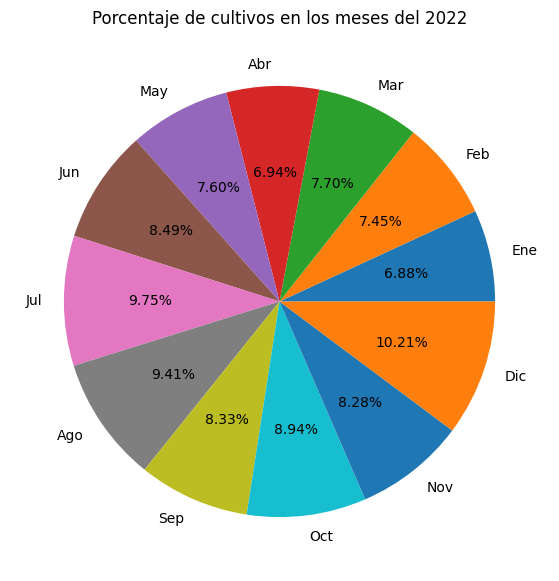

In [ ]:
meses = list(cosechas_df.columns)[4:16]
totales_mensuales = cosechas_df[meses].mean(axis=0)
plt.pie(totales_mensuales, labels=meses, autopct='%1.2f%%')
plt.title('Porcentaje de cultivos en los meses del 2022')
plt.show()